In [7]:
import numpy as np
import matplotlib.pyplot as plt

In [8]:
class KArmedBandit: 
    def __init__(self, k): 
        self.k = k 
        self.means = np.random.uniform(0, 10, size=k)
        self.stds = np.random.uniform(0, 3, size=k)
        
    def pull(self, k):
        return np.random.normal(self.means[k], self.stds[k])
        
    

In [9]:
# random strategy 
def random(bandit, trials=1000):
    total_reward = np.zeros(bandit.k)
    Q = np.zeros(bandit.k)
    N = np.zeros(bandit.k)
    rewards = []
    for i in range(trials): 
        k = np.random.choice(np.arange(bandit.k))
        reward = bandit.pull(k)
        total_reward[k] += reward
        N[k] += 1
        Q[k] = total_reward[k] / N[k]
        
    return np.sum(total_reward)
    


In [10]:
# epsilon greedy 
def epsilon_greedy(bandit, epsilon, trials=1000):
    total_reward = np.zeros(bandit.k)
    Q = np.zeros(bandit.k)
    N = np.zeros(bandit.k)
    for i in range(trials):
        if np.random.uniform(0, 1) <= epsilon:
            k = np.random.choice(np.arange(bandit.k))
        else:
            k = np.argmax(Q)

        reward = bandit.pull(k)
        total_reward[k] += reward
        N[k] += 1
        Q[k] = total_reward[k] / N[k]
    
    return np.sum(total_reward)



In [11]:
# UCB  
def UCB(bandit, c, trials=1000):
    total_reward = np.zeros(bandit.k)
    Q = np.zeros(bandit.k)
    N = np.zeros(bandit.k)
    for i in range(trials):
        ucb = Q + c * np.sqrt(np.log(i+1) / (N+0.00001))
        k = np.argmax(ucb)
        reward = bandit.pull(k)
        total_reward[k] += reward
        N[k] += 1
        Q[k] = total_reward[k] / N[k]
    
    return np.sum(total_reward)


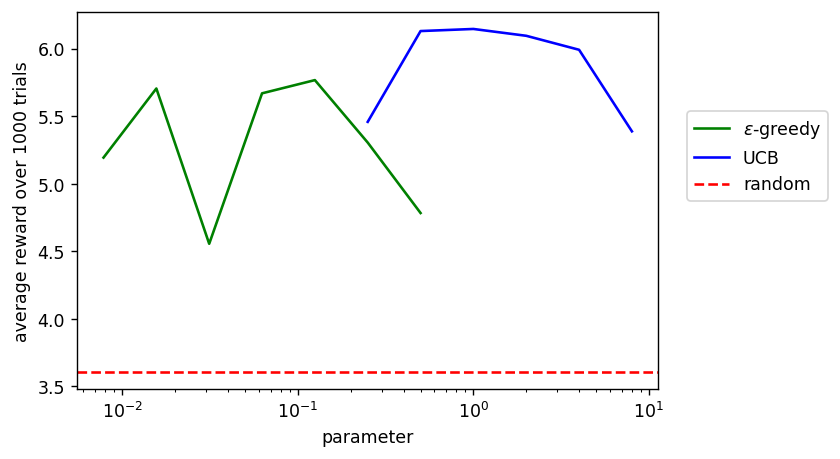

In [12]:
fig, ax = plt.subplots(dpi=125)

np.random.seed(2)
k = 10
bandit = KArmedBandit(k)
trials = 1000

rs = []
epsilons = [1/(2**n) for n in range(1,8)]
for epsilon in epsilons:
    rs.append(epsilon_greedy(bandit, epsilon, trials)/trials)
ax.plot(epsilons, rs, c='g', label='$\epsilon$-greedy')

rs = []
cs = [1/(2**n) for n in range(-3,3)]
for c in cs:
    rs.append(UCB(bandit, c, trials)/trials)
ax.plot(cs, rs, c='b', label='UCB')
    
r = random(bandit, trials)/trials
plt.axhline(r, c='r', linestyle='--', label='random')
    
ax.set_xscale('log')

ax.set_xlabel('parameter')
ax.set_ylabel('average reward over {} trials'.format(trials))

plt.legend(loc=(1.05,0.5))
plt.show()